## Initialisation des librairies


In [1]:
pip install beautifulsoup4

In [2]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import csv
import json
import re

## Lister les URL des livres

In [3]:
# Initialisation des variables
baseURL = "https://archive.org/details/cbk?and%5B%5D=languageSorter%3A%22English%22&and%5B%5D=mediatype%3A%22texts%22&sort=date&page="
deb = 1
fin = 40
livres = []

# Deux boucles for; La première parcourt les pages, la seconde les liens sur chaque page.
for page in range(deb,fin,1):
    html = urlopen(baseURL + str(page))
    bs = BeautifulSoup(html.read(), 'html.parser')
    
    for lien in bs.find('div',{'class':'results'}).find_all('div', {'class':'item-ttl'}):
        livres.append('https://archive.org' + lien.a.attrs['href'])

In [5]:
metadata = []
g = open('metadata.csv', 'w', encoding='UTF8')
writer = csv.writer(g)
writer.writerow(['titre', 'date', 'editeur', 'fichier'])
for livre in livres:
    html = urlopen(livre)
    bs = BeautifulSoup(html.read(), 'html.parser')

    try:
        titre = bs.find('h1', {'class': 'item-title'}).span.text
    except:
        titre = ""

    try:
        date = bs.find('span', {'itemprop': 'datePublished'}).text
    except:
        date = ""

    try:
        publisher = bs.find('span', {'itemprop': 'publisher'}).text
    except:
        publisher = ""

    html = urlopen('https://archive.org/stream' + livre[27:] + livre[27:] + '_djvu.txt')
    bs = BeautifulSoup(html.read(), 'html.parser')
    try:
        texte = bs.find('pre').text
    except:
        texte = "TEXTE PAS OCÉRISÉ"

    dateFormate = re.sub(r'[^0-9]', '', date)
    titreFormate = re.sub(r'[^a-zA-Z0-9]', '', titre)

    nom =  dateFormate + "_" + titreFormate[0:20] + '.txt'
    writer.writerow([titre, date, publisher,  dateFormate + "_" +  titreFormate[0:20] + '.txt'])
    f = open(nom, "a", encoding="utf-8")
    f.write(texte)
    f.close()

g.close()

## Traitement des données

In [1]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [33]:
import pandas as pd
import nltk
import csv
import re

In [34]:
listeStopWords = []
fichierStopWords = 'stopwords.txt'
stop = open(fichierStopWords, "r")
for ligne in stop:
    listeStopWords.append(ligne.rstrip())     
stop.close()

In [35]:
def nettoyer(texte):
    texteAlphaNum = re.sub("[^a-zA-Z]", " ", texte)
    mots = texteAlphaNum.lower().split()

    texteNonStop = []
    for mot in mots:
        if mot not in listeStopWords:
            texteNonStop.append(mot)
            
    return " ".join(texteNonStop)

In [36]:
df = pd.read_csv('metadata.csv')

for fichier in df['fichier']:
    chemin = "output/" + fichier
    try:
        fichierLivre = open(chemin, "r", encoding='utf8')
        texte = fichierLivre.read()
        texteTraite = nettoyer(texte)

        titre = fichier[:-4]

        nom =  titre + '_clean.txt'

        f = open(nom, "a", encoding="utf-8")
        f.write(texteTraite)
        f.close()

        fichierLivre.close()
    except:
        print(fichier)

1947_SecretsofNewEnglandc.txt


In [37]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


# Analyse

In [38]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## Lister occurences

In [52]:
livre = open("clean/1862_TheBookofthehousehol_clean.txt", "r", encoding='utf8')
print(Counter(" ".join(livre).split()).most_common(10))
livre.close()

[('put', 11806), ('water', 10920), ('sugar', 5672), ('butter', 5362), ('salt', 5164), ('cut', 4850), ('boil', 4690), ('add', 4562), ('small', 4430), ('till', 4396)]


## Nuage de mots

In [41]:
# Pour Jupyter Notebook (permet l'impression dans le document)
%matplotlib inline
all_words = '' 

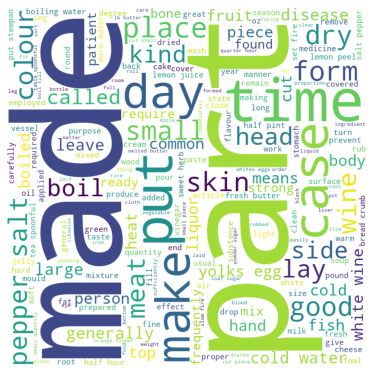

In [54]:
livre = open("clean/1862_TheBookofthehousehol_clean.txt", "r", encoding='utf8')
#texte = livre.read()

wordcloud = WordCloud(width = 700, height = 700, 
                background_color ='white', 
                min_font_size = 10).generate(texte) 
                       
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()
livre.close()

## 100 premières positions pour chaque livre

In [56]:
top = []
g = open('top.csv', 'w', encoding='UTF8')
writer = csv.writer(g)

for fichier in df['fichier']:
    chemin = "clean/" + fichier[:-4] + "_clean.txt"
    try:
        fichierLivre = open(chemin, "r", encoding='utf8')
        writer.writerows(Counter(" ".join(fichierLivre).split()).most_common(100))
        fichierLivre.close()
    except:
        print(fichier)
        
g.close()

1947_SecretsofNewEnglandc.txt
